**Dieses Notebook enthält weitere Visualisierungen für die Präsentation, deren Code aber die an die Kapitel angelehnten Notebooks überladen würde**

In [2]:
## suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## load data
datapath = '../3_data'
from os import chdir; chdir(datapath)
df = pd.read_csv('bank_data.csv', sep=';')


# 1.2.4.3 Correlatinon Examples

Simulation von Korrelationen für den Theorieteil

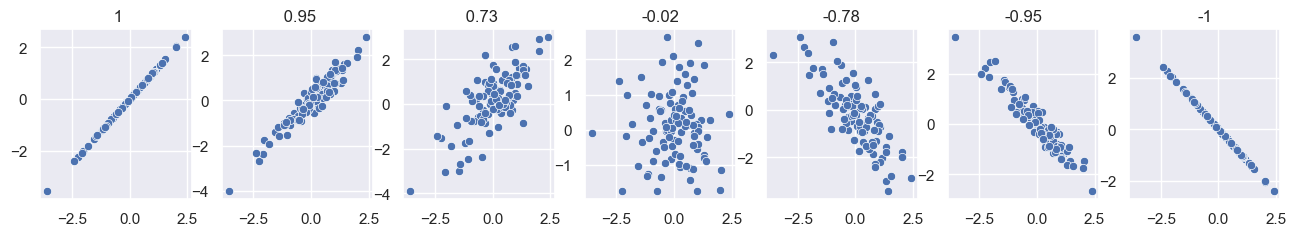

In [6]:
np.random.seed(1234)

x = np.random.randn(100)
y1 = x + np.random.randn(100) / 3
y2 = x + np.random.randn(100) / 1.1
y3 = np.random.randn(100)
y4 = -x + np.random.randn(100) / 1.1
y5 = -x + np.random.randn(100) / 3

f, axes = plt.subplots(nrows=1, ncols=7, figsize=(16, 2.2), sharex=False)

sns.scatterplot(x = x, y = x,  ax=axes[0])
sns.scatterplot(x = x, y = y1, ax=axes[1])
sns.scatterplot(x = x, y = y2, ax=axes[2])
sns.scatterplot(x = x, y = y3, ax=axes[3])
sns.scatterplot(x = x, y = y4, ax=axes[4])
sns.scatterplot(x = x, y = y5, ax=axes[5])
sns.scatterplot(x = x, y = -x,  ax=axes[6])

axes[0].set_title(' 1')
axes[1].set_title(' 0.95')
axes[2].set_title(' 0.73')
axes[3].set_title('-0.02')
axes[4].set_title('-0.78')
axes[5].set_title('-0.95')
axes[6].set_title('-1');

# 2 Klassifikation

Vorbereitung für das Folgende

In [26]:
from bfh_cas_pml import prep_data, prep_demo_data
X_train, X_test, y_train, y_test = prep_data('bank_data_prep.csv', 'y')
X_demo, y_demo = prep_demo_data('demo_data_class.csv', 'y')

# 2.1.1.1  KNeighborsClassifier - Theorie

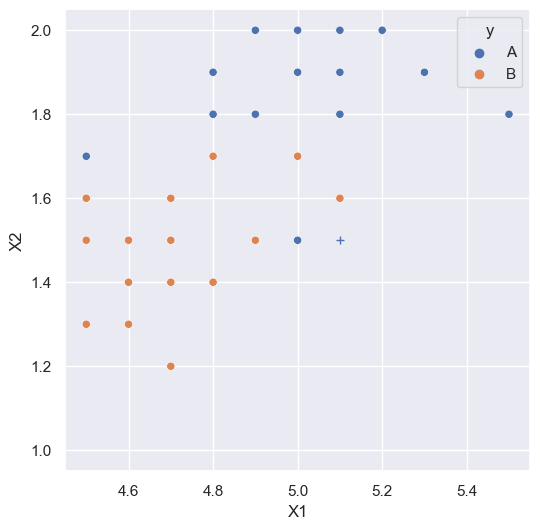

In [28]:
demo_df = pd.read_csv('demo_data_class.csv')
X_demo = demo_df.drop('y', axis=1)
y_demo = demo_df['y']
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', data=demo_df, hue='y')
ax.set(xlim=(4.45, 5.55), ylim=(0.95, 2.05))
ax.plot(5.1, 1.5, '+');

# 2.1.1.4  Standardisieren von Train- und Test-Features (Nachtrag)

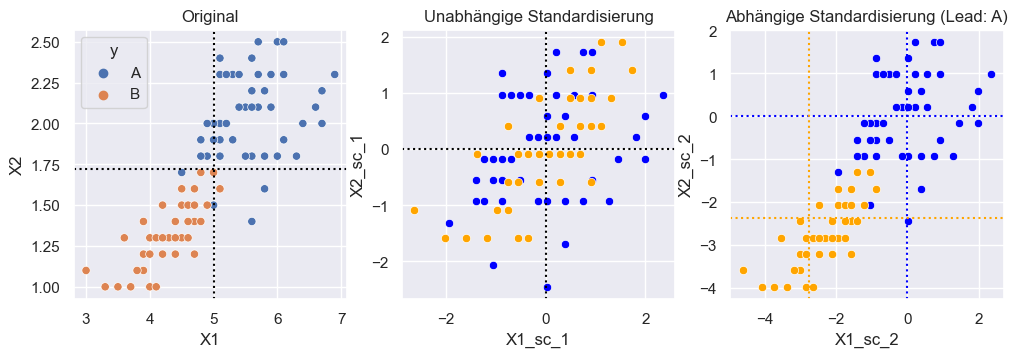

In [30]:
## apply StandardScaler for new data
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('demo_data_class.csv')
X2 = df2.drop('y', axis=1)
y2 = df2['y']

XA = X2[y2 == 'A']
XB = X2[y2 == 'B']

scaler = StandardScaler()
scaler.fit(XA)
XA_sc = scaler.transform(XA)
XB_sc = scaler.transform(XB)

scaler_B = StandardScaler()
scaler_B.fit(XB)
XBB_sc = scaler_B.transform(XB)

## visualisieren
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5), sharex=False)

ax = sns.scatterplot(x='X1', y='X2', hue = 'y', data=df2, ax=axes[0])
ax.axhline(df2['X2'].mean(), color='black', linestyle=':')
ax.axvline(df2['X1'].mean(), color='black', linestyle=':')
ax.set(xlabel='X1', ylabel='X2', title='Original')


ax = sns.scatterplot(x = XA_sc[:,0], y = XA_sc[:,1], color='blue', ax=axes[1])
ax = sns.scatterplot(x = XBB_sc[:,0], y = XBB_sc[:,1], color='orange', ax=axes[1])
ax.axhline(0, color='black', linestyle=':')
ax.axvline(0, color='black', linestyle=':')
ax.set(xlabel='X1_sc_1', ylabel='X2_sc_1', title='Unabhängige Standardisierung')

ax = sns.scatterplot(x = XA_sc[:,0], y = XA_sc[:,1], color='blue', ax=axes[2])
ax = sns.scatterplot(x = XB_sc[:,0], y = XB_sc[:,1], color='orange', ax=axes[2])
ax.axhline(XA_sc[:,0].mean(), color='blue', linestyle=':')
ax.axvline(XA_sc[:,1].mean(), color='blue', linestyle=':')
ax.axhline(XB_sc[:,0].mean(), color='orange', linestyle=':')
ax.axvline(XB_sc[:,1].mean(), color='orange', linestyle=':')
ax.set(xlabel='X1_sc_2', ylabel='X2_sc_2', title='Abhängige Standardisierung (Lead: A)');

# 2.2.1.1  DecisionTreeClassifier - Theorie

In [32]:
demo_data = pd.read_csv("demo_data_class.csv")
print(demo_data.head())

   y   X1   X2
0  A  6.0  2.5
1  A  5.1  1.9
2  A  5.9  2.1
3  A  5.6  1.8
4  A  5.8  2.2


|--- X2 <= 1.75
|   |--- X1 <= 5.35
|   |   |--- class: B
|   |--- X1 >  5.35
|   |   |--- class: A
|--- X2 >  1.75
|   |--- class: A



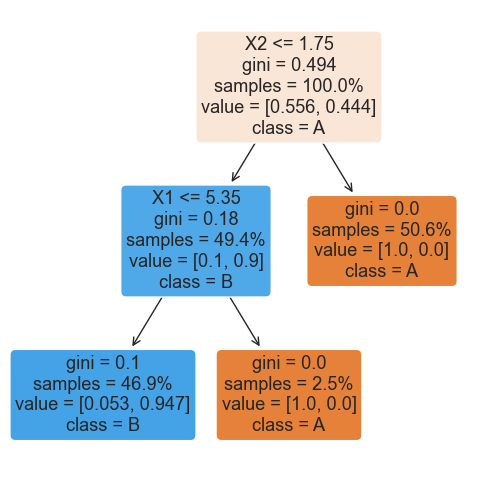

In [33]:
X = demo_data.drop('y', axis=1)
y = demo_data['y']

## tran a model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=2,
    random_state=1234)
model.fit(X, y)

## show rules
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

## plot tree
from sklearn.tree import plot_tree
plt.figure(figsize=(6, 6))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples

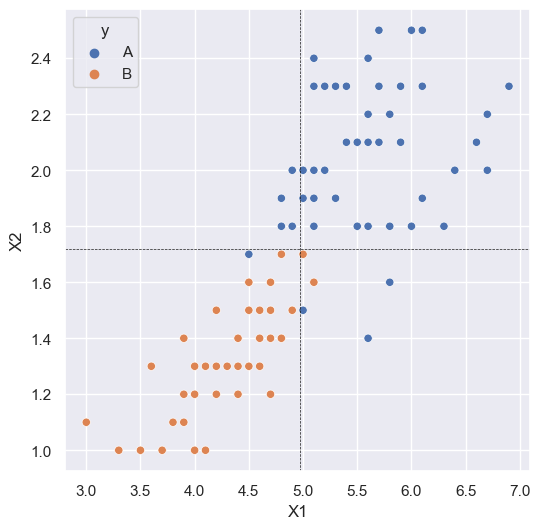

In [34]:
demo_data = pd.read_csv('demo_data_class.csv')
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', data=demo_data, hue='y')
ax.axhline(y=1.72, color='k', linewidth=0.5, linestyle='dashed')
ax.axvline(x=4.97, color='k', linewidth=0.5, linestyle='dashed');

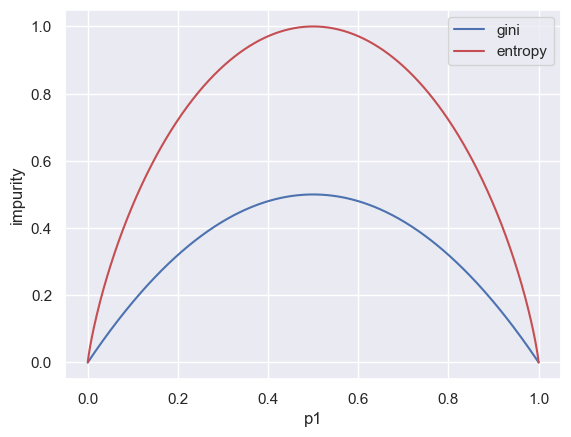

In [35]:
## comparison behavior of gini and entropy

def gini(n1, n2):
    n = n1 + n2
    p1 = n1 / n
    p2 = n2 / n
    return((1 - p1) * (1 - p2) * 2)

def entropy(n1, n2):
    n = n1 + n2
    p1 = n1 / n
    p2 = n2 / n
    if p1 == 0 or p2 == 0:
        return(0)
    else:
        return(-(p1 * np.log2(p1) + p2 * np.log2(p2)))

n = 1000
ginis = []
entropies = []
for i in range(n + 1):
    ginis.append(gini(i, n - i))
    entropies.append(entropy(i, n - i))

fig, ax = plt.subplots()
sns.lineplot(x=[tmpList/n for tmpList in range(n + 1)], y=ginis, ax=ax, label='gini', color='b')
sns.lineplot(x=[tmpList/n for tmpList in range(n + 1)], y=entropies, ax=ax, label='entropy', color='r')
ax.set(xlabel='p1', ylabel='impurity');

# 2.2.3.1  AdaBoostClassifier - Theorie

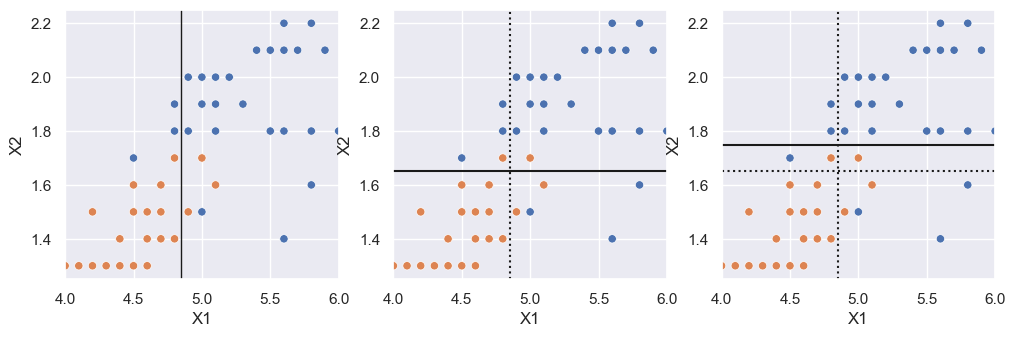

In [37]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5), sharex=True)

ax = sns.scatterplot(x='X1', y='X2', data=X_demo, hue=y_demo, legend=False, ax=axes[0])
ax.set(xlim=(4, 6), ylim=(1.25, 2.25))
ax.axvline(x=4.85, color='k', linewidth=1)

ax = sns.scatterplot(x='X1', y='X2', data=X_demo, hue=y_demo, legend=False, ax=axes[1])
ax.set(xlim=(4, 6), ylim=(1.25, 2.25))
ax.axvline(x=4.85, color='k', linestyle='dotted')
ax.axhline(y=1.65, color='k')

ax = sns.scatterplot(x='X1', y='X2', data=X_demo, hue=y_demo, legend=False, ax=axes[2])
ax.set(xlim=(4, 6), ylim=(1.25, 2.25))
ax.axvline(x=4.85, color='k', linestyle='dotted')
ax.axhline(y=1.65, color='k', linestyle='dotted')
ax.axhline(y=1.75, color='k');

# 2.3.2.2  SVC - Praxis

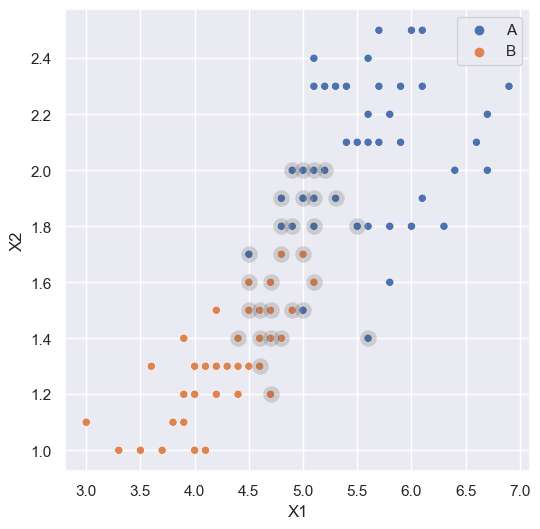

In [39]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_demo, y_demo)
sv = model.support_vectors_

plt.figure(figsize = (6,6)) 
sns.scatterplot(
    x='X1', 
    y='X2', 
    data=X_demo, hue=y_demo)
sns.scatterplot(
    x=sv[:, 0], 
    y=sv[:, 1],
    marker='o', s=150,  color='0.3', alpha=0.2);

# 2.3.3.1  GaussianNB - Theorie

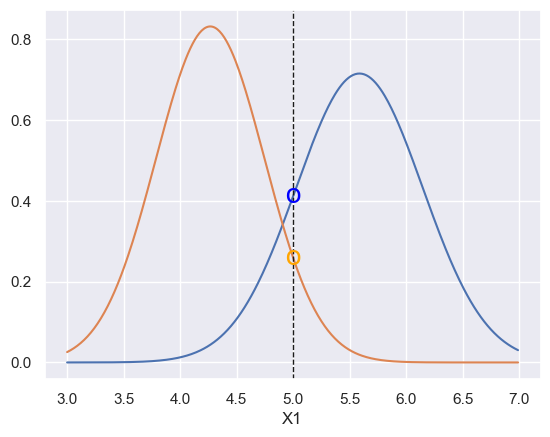

In [41]:
## train model
X_nb_train = X_demo
y_nb_train = y_demo

X_nb_train = X_nb_train.drop('X2', axis=1)
#print(X_train)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_nb_train, y_nb_train)

## collect data
mean_a = model.theta_[0]
mean_b = model.theta_[1]

## !! .sigma is variance, calculate square(variance) root for standard deviation
std_a = np.sqrt(model.var_[0])
std_b = np.sqrt(model.var_[1])

from scipy.stats import norm
x_a = np.arange(3, 7, 0.01)
y_a = norm.pdf(x_a, mean_a, std_a)
sns.lineplot(x=x_a, y=y_a)

x_b = np.arange(3, 7, 0.01)
y_b = norm.pdf(x_b, mean_b, std_b)
sns.lineplot(x=x_b, y=y_b)
plt.xlabel('X1')
plt.axvline(x=5, color='k', linewidth=1.0, linestyle='dashed')
plt.annotate('o',
             xy=(5, norm.pdf(5, mean_a, std_a)),
             color='blue',
             size=20,
             ha='center',
             va='center')
plt.annotate('o',
             xy=(5, norm.pdf(5, mean_b, std_b)),
             color='orange',
             size=20,
             ha='center',
             va='center');

# 2.3.4.1  LogisticRegression - Theorie

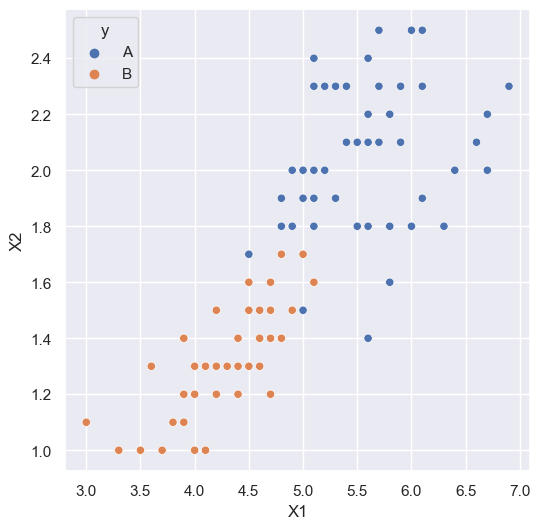

In [43]:
X = X_demo.X1
y_num = np.where(y_demo == 'A', 1, 0)
plt.figure(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', data=X_demo, hue=y_demo);

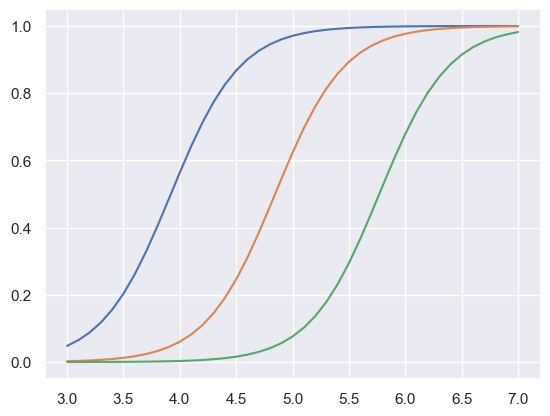

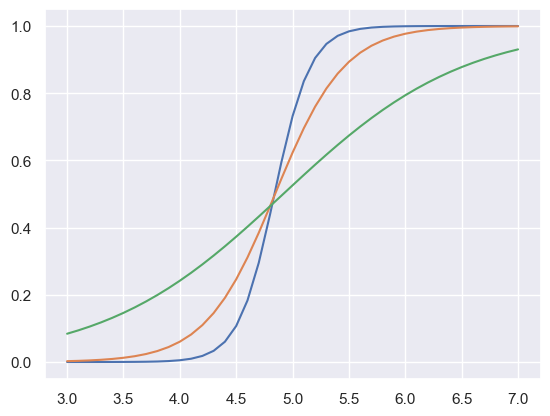

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_demo[['X1']], y_demo) 
b0 = model.intercept_
b1 = model.coef_
x = np.arange(3, 7.1, 0.1)

def logplot (x, b0, b1):
    y = 1 - (1 / (1 + np.exp(-b0 - b1 * x)))[0]
    plt.plot(x, y)
    #plt.show()

logplot(x, b0 - 3, b1)
logplot(x, b0, b1)
logplot(x, b0 + 3, b1)
plt.show()

logplot(x, b0 + 14.5, b1 - 3)
logplot(x, b0, b1)
logplot(x, b0 - 9.6, b1 + 2)

# 3 Regression

Vorbereitung für das Folgende

In [47]:
from bfh_cas_pml import prep_data, prep_demo_data
X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', 'Price')
X_demo, y_demo = prep_demo_data('demo_data_regr.csv', 'y')

## generate synthetic testset
X_synth = np.linspace(X_demo.min(), X_demo.max(), 100).reshape(-1,1)

# 3.2.1.1  LinearRegression - Theorie

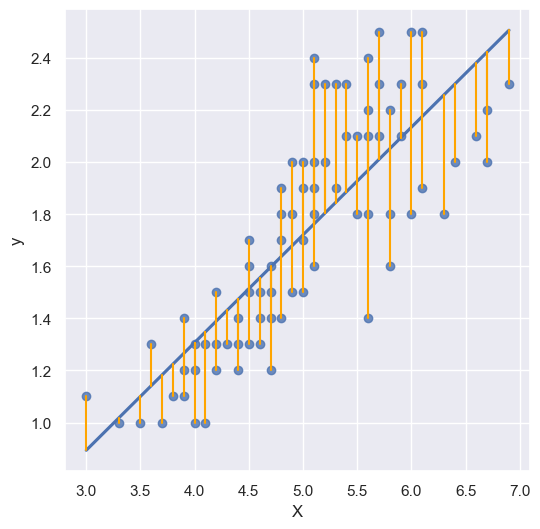

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_demo, y_demo)
pred = model.predict(X_demo)

from pylab import * ## regplor, residplot
ax = plt.figure(figsize=(6,6))
ax = sns.regplot(x=X_demo['X'], y=y_demo, ci=None)
ax.set(xlabel='X', ylabel='y')
for ix in range(len(X_demo)):
    plot([X_demo['X'][ix], X_demo['X'][ix]], [pred[ix], y_demo[ix]], 'orange');

x at iamin : 3.00
x at iqmin : 3.80
median(nr) : 3.00
mean(nr)   : 3.80


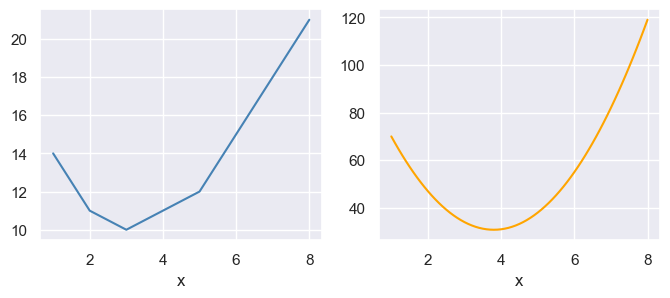

In [50]:
nr = 1, 2, 3, 5, 8 ## fibonacci!
#nr = 1, 2, 3, 4, 5, 8
#nr = sort(np.random.randint(1, 1000, 100))

#sns.stripplot(x=nr, jitter=0)
min = nr[0]
max = nr[len(nr)-1]
step=0.1

x = np.arange(min, max + step, step)

avals = []
qvals = []

## loop over x
for i in range(len(x)):
    a = 0
    q = 0

    ## loop over nr
    for j in range(len(nr)):
        a = a + abs(x[i] - nr[j])
        q = q + (x[i] - nr[j])**2

    avals.append(a)
    qvals.append(q)

## indices of smallest values
iamin = np.argmin(avals)
iqmin = np.argmin(qvals)
#print(iamin, iqmin)

## plot
sns.set()
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=False)

ax = sns.lineplot(x=x, y=avals, color='steelblue', ax=axes[0])
ax.set_xlabel('x')
ax = sns.lineplot(x=x, y=qvals, color='orange', ax=axes[1])
ax.set_xlabel('x');

## smallest values of x
print('x at iamin : %1.2f' %(x[iamin]))
print('x at iqmin : %1.2f' %(x[iqmin]))
print('median(nr) : %1.2f' %(np.median(nr)))
print('mean(nr)   : %1.2f' %(np.mean(nr)))

# 3.2.2.1  Ridge & Lasso (Regularisierung) - Theorie

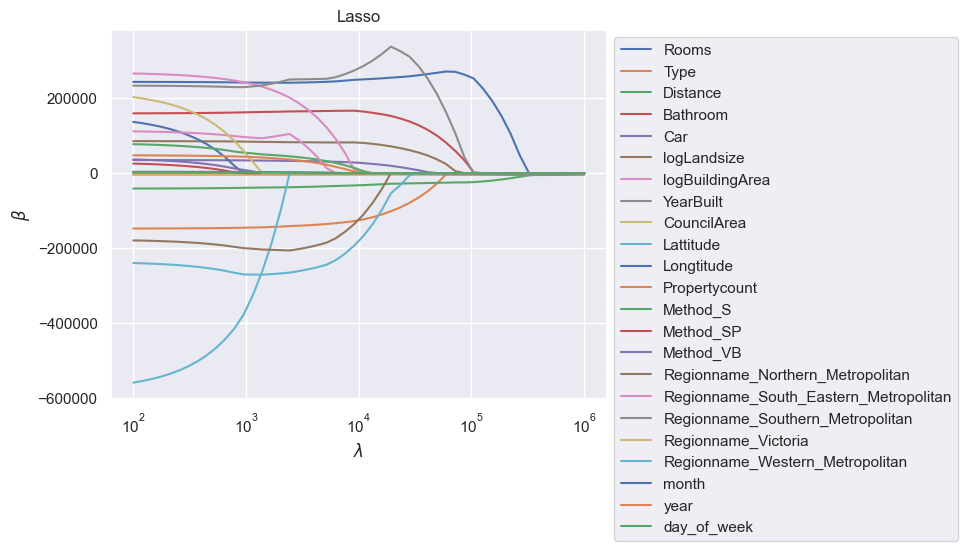

In [52]:
## Lasso: behavoir of betas over a range of alphas
#n_alphas = 100
n_alphas = 50

#alphas = np.logspace(-2, 2, n_alphas)
alphas = np.logspace(2, 6, n_alphas)


from sklearn.linear_model import Lasso

coefs = []
for a in alphas:
#    model = Lasso(alpha=a, normalize=True)
    model = Lasso(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

## Display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.title('Lasso')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.legend(X_train.columns, bbox_to_anchor=(1, 1));

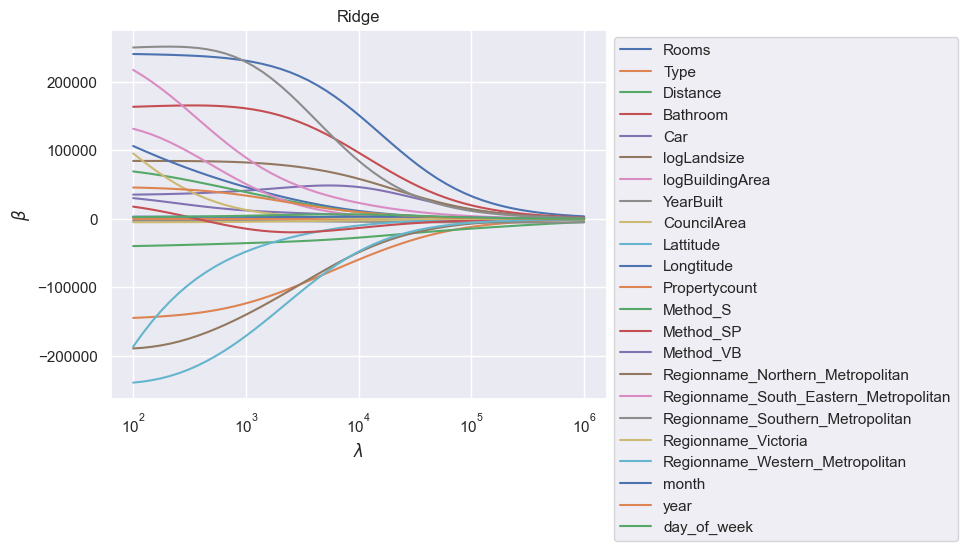

In [53]:
n_alphas = 50

#alphas = np.logspace(0, 4, n_alphas)
alphas = np.logspace(2, 6, n_alphas)



from sklearn.linear_model import Ridge

coefs = []
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

## display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title('Ridge')
plt.legend(X_train.columns, bbox_to_anchor=(1, 1));

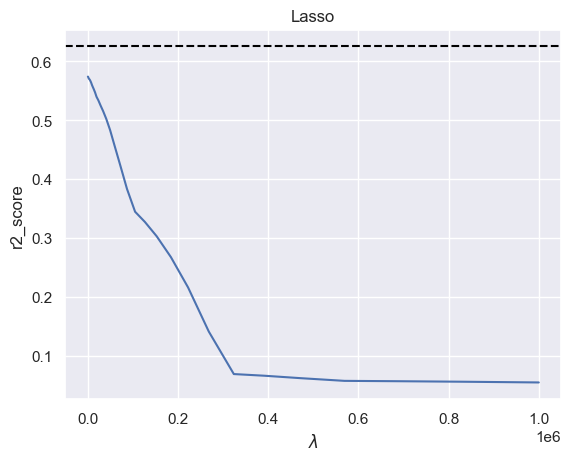

In [54]:
## Lasso: alphas as tuning parameter
from sklearn.linear_model import Lasso
    
n_alphas = 50
alphas = np.logspace(2, 6, n_alphas)

scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

ax = sns.lineplot(x=alphas, y=scores)
#ax.set_xscale('log')
plt.title('Lasso')
plt.xlabel(r'$\lambda$')
plt.ylabel('r2_score')
ax.axhline(y=0.6255, color='black', linestyle='dashed');

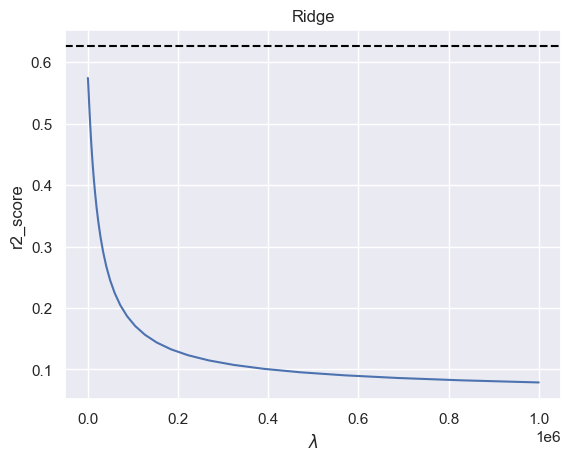

In [55]:
## Ridge: alphas as tuning parameters
from sklearn.linear_model import Ridge

n_alphas = 50
alphas = np.logspace(2, 6, n_alphas)
alphas = np.insert(alphas, 0, 0)

scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

ax = sns.lineplot(x=alphas, y=scores)
#ax.set_xscale('log')
plt.title('Ridge')
plt.xlabel(r'$\lambda$')
plt.ylabel('r2_score')
ax.axhline(y=0.6255, color='black', linestyle='dashed');

# 3.2.2.3 Nachtrag zu Parameter normalize

         X1        X2
0  1.190201  1.801020
1  0.119020  0.413864
2  1.071181  0.876249
3  0.714121  0.182671
4  0.952161  1.107442
         X1        X2
0  0.397898  0.602102
1  0.223351  0.776649
2  0.550049  0.449951
3  0.796306  0.203694
4  0.462303  0.537697
         X1        X2
0  0.551335  0.834284
1  0.276381  0.961048
2  0.774018  0.633163
3  0.968806  0.247819
4  0.651945  0.758266
         X1        X2
0  0.660848  1.000000
1  0.287583  1.000000
2  1.000000  0.818021
3  1.000000  0.255798
4  0.859784  1.000000


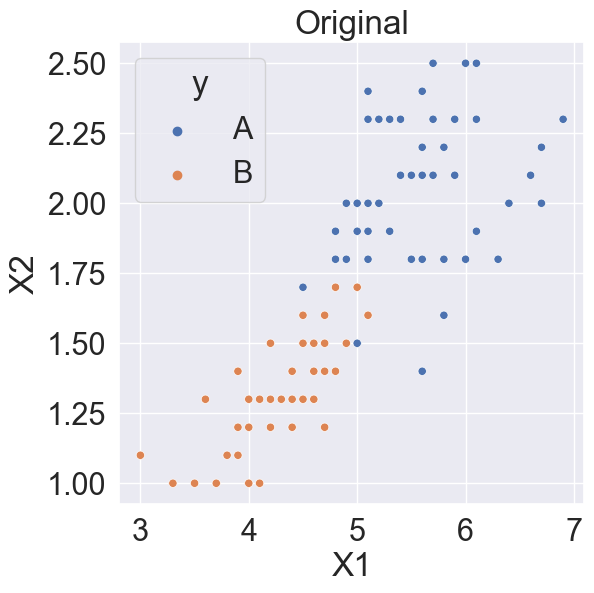

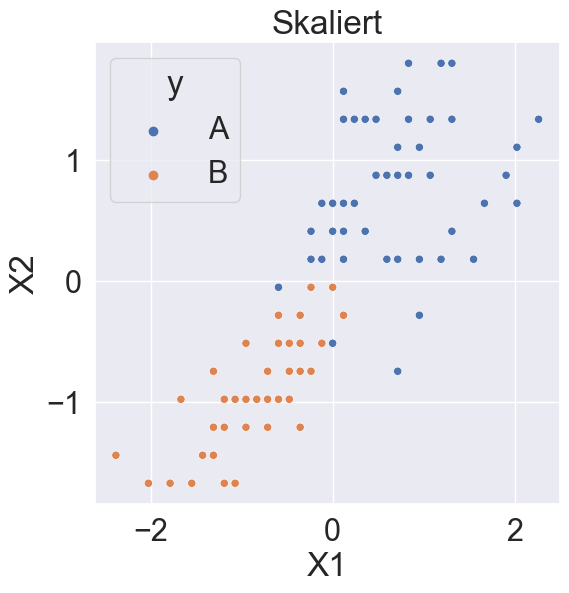

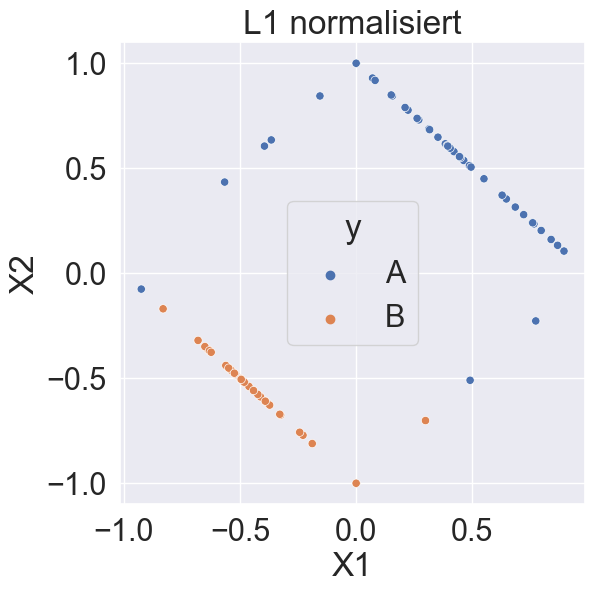

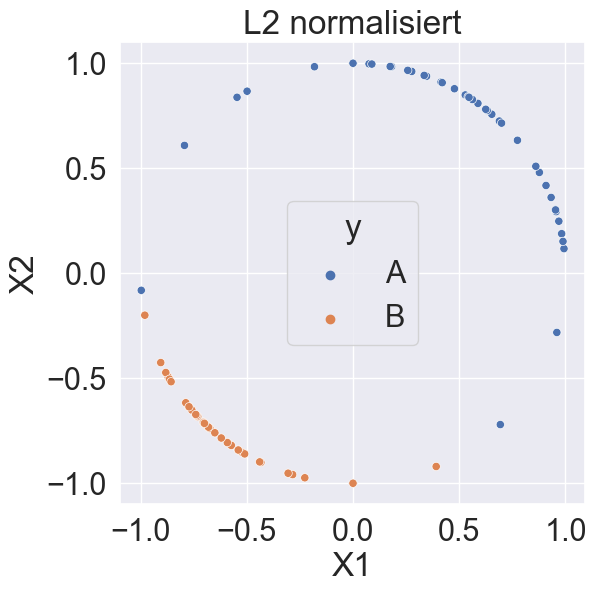

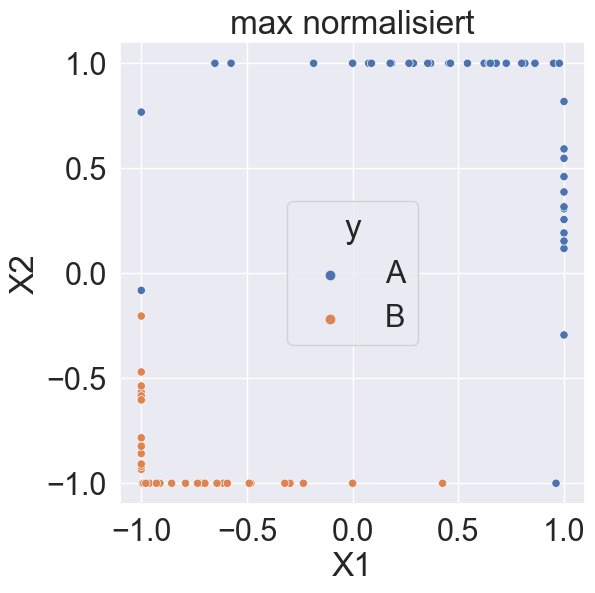

In [57]:
sns.set(font_scale=2.0)

## original
data = pd.read_csv('demo_data_class.csv')
X = data.drop('y', axis=1)
y = data['y']
plt.figure(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', hue=y, data=X)
plt.title('Original');

## standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled  = pd.DataFrame(
    scaler.transform(X), 
    columns=X.columns)
print(X_scaled.head())
plt.figure(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', hue=y, data=X_scaled)
plt.title('Skaliert');

## normalize L1 form (row wise)
from sklearn.preprocessing import Normalizer
X_normalized_L1 = pd.DataFrame(
    Normalizer(norm='l1').fit_transform(X_scaled), 
    columns=X_scaled.columns)
print(X_normalized_L1.head())
plt.figure(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', hue=y, data=X_normalized_L1)
plt.title('L1 normalisiert');

## normalize L2 form (row wise)
from sklearn.preprocessing import Normalizer
X_normalized_L2 = pd.DataFrame(
    Normalizer(norm='l2').fit_transform(X_scaled), 
    columns=X_scaled.columns)
print(X_normalized_L2.head())
plt.figure(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', hue=y, data=X_normalized_L2)
plt.title('L2 normalisiert');

## normalize max form (row wise)
from sklearn.preprocessing import Normalizer
X_normalized_L1 = pd.DataFrame(
    Normalizer(norm='max').fit_transform(X_scaled), 
    columns=X_scaled.columns)
print(X_normalized_L1.head())
plt.figure(figsize=(6,6))
sns.scatterplot(x='X1', y='X2', hue=y, data=X_normalized_L1)
plt.title('max normalisiert');


# 3.3.1.1  KNeighborsRegressor - Theorie

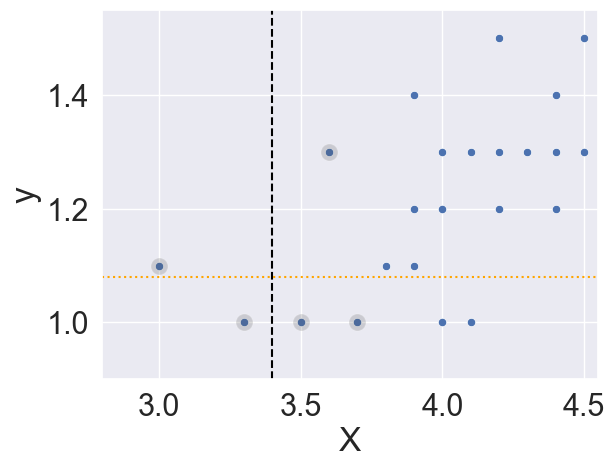

In [59]:
## the idea
tmp_df = X_demo[X_demo['X'] <= 3.7]
ax = sns.scatterplot(x=X_demo['X'], y=y_demo)
ax = sns.scatterplot(x='X', y=y_demo, data= tmp_df,
               marker='o', s=150,  color='0.3', alpha=0.2)
ax.set(xlim=(2.8, 4.55), ylim=(0.9, 1.55))
plt.axvline(3.4, color='black', linestyle='--')
plt.axhline(1.08, color='orange', linestyle=':')
ax.set(xlabel='X', ylabel='y');

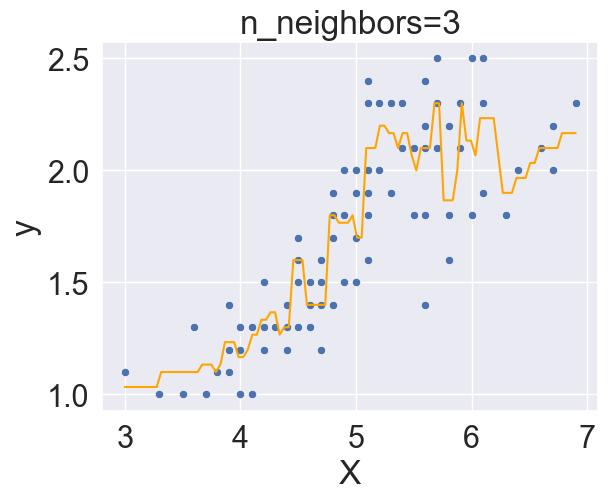

C:\Users\werne\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


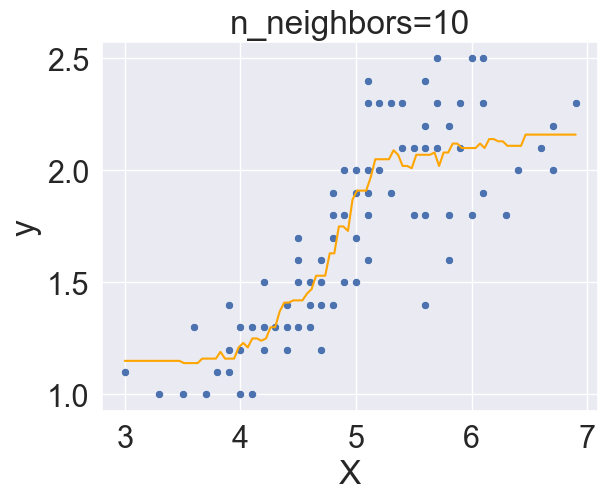

In [60]:
## behavior of KNeighborsRegressor with different values of n_neighbors
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_demo.values, y_demo)

y_pred = model.predict(X_synth)

ax = sns.scatterplot(x=X_demo['X'], y=y_demo)
ax = sns.lineplot(x=X_synth[:,0], y=y_pred, color='orange')
ax.set_title('n_neighbors=3')
ax.set(xlabel='X', ylabel='y')
plt.show()

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_demo, y_demo)
y_pred = model.predict(X_synth)
ax = sns.scatterplot(x=X_demo['X'], y=y_demo)
ax = sns.lineplot(x=X_synth[:,0], y=y_pred, color='orange')
ax.set_title('n_neighbors=10')
ax.set(xlabel='X', ylabel='y')
plt.show()

# 3.3.2.1  DecisionTreeRegressor - Theorie

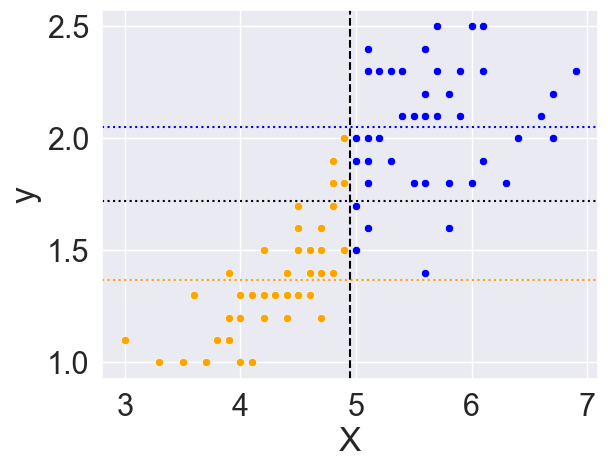

In [62]:
# the idea
X_demo_ = X_demo.copy()
X_demo_['y'] = y_demo

demo_df_lower = X_demo_[X_demo_['X'] <= 4.95]
demo_df_upper = X_demo_[X_demo_['X'] > 4.95]

#mean_ = demo_df['y'].mean()
mean_ = y_demo.mean()

mean_lower = demo_df_lower['y'].mean()
mean_upper = demo_df_upper['y'].mean()

ax = sns.scatterplot(x='X', y='y', data=demo_df_lower, color='orange')
ax = sns.scatterplot(x='X', y='y', data=demo_df_upper, color='blue')
plt.axhline(mean_, color='black', linestyle=':')
plt.axhline(mean_lower, color='orange', linestyle=':')
plt.axhline(mean_upper, color='blue', linestyle=':')
plt.axvline(4.95, color = 'black', linestyle='--');

min_MSE   : 0.0644
min_split : 4.7500


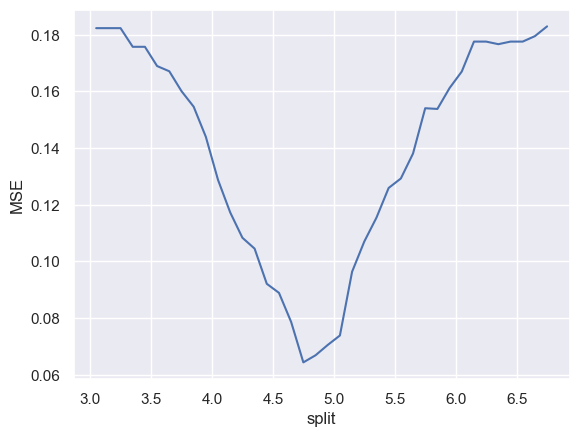

In [63]:
## find best split
from sklearn.metrics import mean_squared_error
mses = []
min_mse = 100
min_split = 0
split = np.arange(3.05, 6.85, 0.1)

for i in split:

    mean_1 = X_demo_[X_demo_['X'] < i].y.mean()
    mean_2 = X_demo_[X_demo_['X'] >= i].y.mean()
    
    y_pred = []
    for j in range(y_demo.shape[0]):
        if X_demo.iloc[j, 0] < i:
            y_pred.append(mean_1)
        else:
            y_pred.append(mean_2)
    
    mse = mean_squared_error(y_demo, y_pred)
    mses.append(mse)
    if mse < min_mse:
        min_mse = mse
        min_split = i

print('min_MSE   : %.4f' % (min_mse))
print('min_split : %6.4f' % (min_split))

sns.set()
fig = sns.lineplot(x=split, y=mses)
plt.xlabel("split")
plt.ylabel("MSE");

In [64]:
## control
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_demo, y_demo)
print(export_text(model))

|--- feature_0 <= 4.75
|   |--- value: [1.29]
|--- feature_0 >  4.75
|   |--- value: [2.00]



|--- feature_0 <= 4.75
|   |--- value: [1.29]
|--- feature_0 >  4.75
|   |--- value: [2.00]



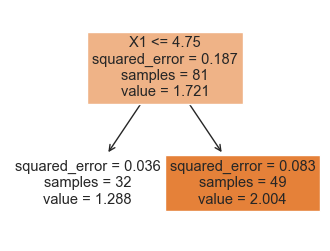

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_demo, y_demo)
print(export_text(model))

from sklearn.tree import plot_tree
plt.figure(figsize=(4, 3))
plot_tree(model,
          feature_names=X.columns,
          filled=True);

# 3.3.2.2  DecisionTreeRegressor - Praxis

[Text(0.5, 0, 'min_impurity_decrease'), Text(0, 0.5, 'r2_score')]

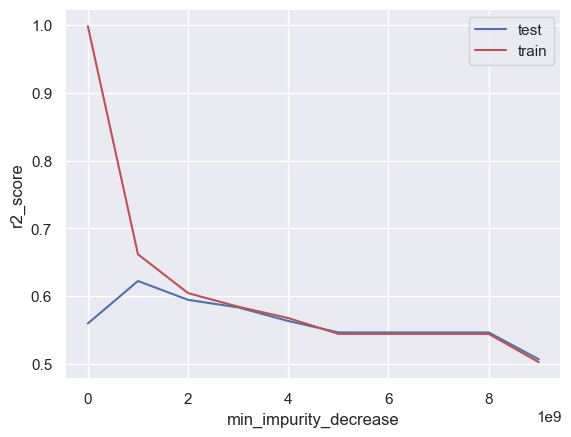

In [67]:
## plot for slides

X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', 'Price')

err_train = []
err_test = []

## mod in slides
#mids = range(0, 10000, 1000)
mids = range(0, 10000000000, 1000000000)


for mid in mids:
    model = DecisionTreeRegressor(min_impurity_decrease = mid)
    model.fit(X_train ,y_train)
    err_train.append(model.score(X_train, y_train))
    err_test.append(model.score(X_test, y_test))
                     
fig, ax = plt.subplots()
sns.lineplot(x=mids, y=err_test, ax=ax, label='test', color='b')
sns.lineplot(x=mids, y=err_train, ax=ax, label='train', color='r')
ax.set(xlabel='min_impurity_decrease', ylabel='r2_score')

[Text(0.5, 0, 'min_samples_leaf'), Text(0, 0.5, 'r2_score')]

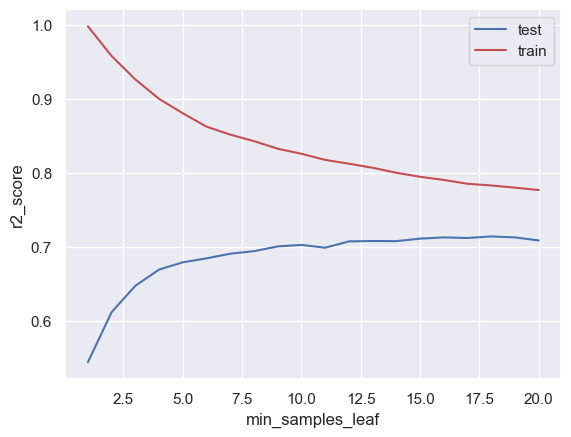

In [68]:
## plot for slides
err_train = []
err_test = []

msls = range(1, 21)

for msl in msls:
    model = DecisionTreeRegressor(min_samples_leaf = msl)
    model.fit(X_train ,y_train)
    err_train.append(model.score(X_train, y_train))
    err_test.append(model.score(X_test, y_test))
                     
fig, ax = plt.subplots()
sns.lineplot(x=msls, y=err_test, ax=ax, label='test', color='b')
sns.lineplot(x=msls, y=err_train, ax=ax, label='train', color='r')
ax.set(xlabel='min_samples_leaf', ylabel='r2_score')

# private

## 3.2.1.1 plot for regression theory

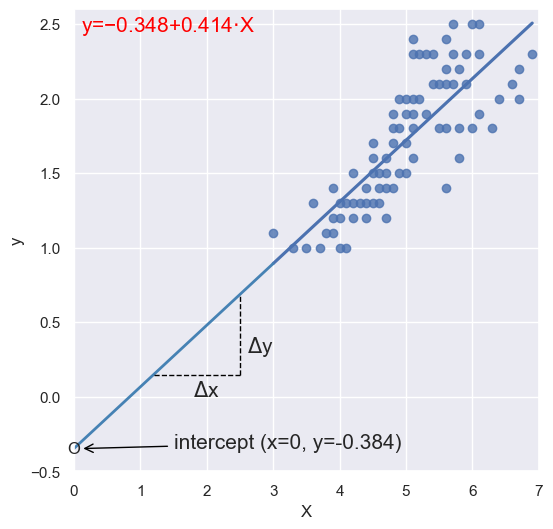

In [71]:
demo_data_regr = pd.read_csv('demo_data_regr.csv')
target = 'y'
X_demo = demo_data_regr.drop(target, axis=1)
y_demo = demo_data_regr[target]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_demo, y_demo)
b0 = model.intercept_
b1 = model.coef_[0]
x1 = 1.2
x2 = 2.5
y1 = b0 + b1 * x1
y2 = b0 + b1 * x2
ls0 = np.linspace(0, 3, 100)
ls1 = b0 + b1 * ls0

plt.figure(figsize=(6,6))
ax = sns.regplot(x=X_demo, y=y_demo, ci=None)
ax.set(xlabel='X', ylabel='y')
ax.set(xlim=(0, 7),ylim=(-0.5, 2.6))
ax.text(0.1, 2.45, 'y=−0.348+0.414$\cdot$X', c='red', size=15)
plt.plot(ls0, ls1, color='steelblue', linewidth=2)
plt.annotate('O', (0, b0), ha='center', va='center')
plt.annotate("intercept (x=0, y=-0.384)", xy=(0.1, b0), xytext=(1.5, b0), 
             size=15, arrowprops=dict(color='black',arrowstyle="->"))
plt.plot([x1, x2], [y1, y1], linewidth=1, color='black', linestyle='dashed')
plt.plot([x2, x2], [y1, y2], linewidth=1, color='black', linestyle='dashed')
ax.text(1.8, 0, '$\Delta$x', size=15)
ax.text(2.6, 0.3, '$\Delta$y', size=15);